In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#generate 20 artifical data points
N = 20

#random data ranging from -5 to 5
X = np.random.random(N)*10-5

In [5]:
#generate data points on Y axis
Y = 0.5*X-1+np.random.random(N)

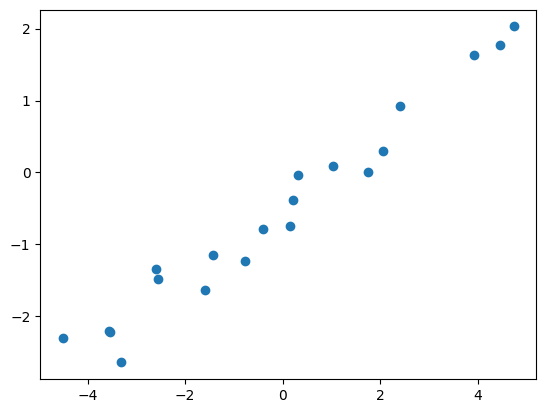

In [7]:
#plt the synthetic data
plt.scatter(X,Y)

In [8]:
#create the binary regression model
#creating the linear model with 1 input and 1 output
model = nn.Linear(1,1)

In [9]:
model

Linear(in_features=1, out_features=1, bias=True)

In [13]:
#definnig the loss function
criterion = nn.MSELoss()

In [14]:
criterion

MSELoss()

In [17]:
#defining the optimizer, here we are using SGD optimizer
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [18]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [19]:
#transform the data
#we would like the data to be of a specific shape
#(number_of_samples X number_of_dimensions)

X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [21]:
X,Y

(array([[ 0.15542474],
        [-3.55779209],
        [ 2.4116893 ],
        [ 1.02653067],
        [-1.58795036],
        [ 0.20011586],
        [-4.51002086],
        [ 4.44428327],
        [-0.76868489],
        [ 1.74024006],
        [-3.31433999],
        [ 4.73302061],
        [ 2.05118381],
        [ 0.30387717],
        [-1.42796048],
        [-2.6089342 ],
        [-2.54765484],
        [ 3.92407112],
        [-0.39681127],
        [-3.54704735]]),
 array([[-7.47523813e-01],
        [-2.20108496e+00],
        [ 9.22533265e-01],
        [ 9.22913204e-02],
        [-1.63490243e+00],
        [-3.82162450e-01],
        [-2.29995844e+00],
        [ 1.77435255e+00],
        [-1.23880016e+00],
        [ 1.39058249e-03],
        [-2.64593104e+00],
        [ 2.03034862e+00],
        [ 2.98677789e-01],
        [-3.62835801e-02],
        [-1.14361304e+00],
        [-1.34131314e+00],
        [-1.47794403e+00],
        [ 1.63056624e+00],
        [-7.86275379e-01],
        [-2.22525730e+00]

In [22]:
#transform the data
#pytorch does not allow the conventional numpy array rather it works with the torch tensors
#torch tensors are kind of special array that works with the pytorch library and they are different from the numpy array
#also we need to change the datatype also as pytorch is picky about the datatypes
#it doesn not allow the multiplication of floar 32 and float64
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [23]:
type(inputs), type(targets)

(torch.Tensor, torch.Tensor)

In [25]:
#train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  optimizer.zero_grad() # this will prevents pytorch to accumulate the gradients when we hit the backwords
  outputs = model(inputs)
  loss = criterion(outputs,inputs)
  losses.append(loss.item()) #we use item function here because loss is a single value and it will convert the loss value from pytorch to python understandables and helps in plotting as well
  loss.backward() # this calculates the gradient (partial differentialtion of the loss function)
  optimizer.step() #this calculates the gradient descent equation theta = theta - learning_rate(gradient)
  print(f'Epoch{it+1}/{n_epochs}, Loss:{loss.item():.4f}')



Epoch1/30, Loss:24.7148
Epoch2/30, Loss:5.6809
Epoch3/30, Loss:1.3903
Epoch4/30, Loss:0.3925
Epoch5/30, Loss:0.1411
Epoch6/30, Loss:0.0660
Epoch7/30, Loss:0.0369
Epoch8/30, Loss:0.0225
Epoch9/30, Loss:0.0141
Epoch10/30, Loss:0.0090
Epoch11/30, Loss:0.0058
Epoch12/30, Loss:0.0037
Epoch13/30, Loss:0.0024
Epoch14/30, Loss:0.0015
Epoch15/30, Loss:0.0010
Epoch16/30, Loss:0.0006
Epoch17/30, Loss:0.0004
Epoch18/30, Loss:0.0003
Epoch19/30, Loss:0.0002
Epoch20/30, Loss:0.0001
Epoch21/30, Loss:0.0001
Epoch22/30, Loss:0.0000
Epoch23/30, Loss:0.0000
Epoch24/30, Loss:0.0000
Epoch25/30, Loss:0.0000
Epoch26/30, Loss:0.0000
Epoch27/30, Loss:0.0000
Epoch28/30, Loss:0.0000
Epoch29/30, Loss:0.0000
Epoch30/30, Loss:0.0000


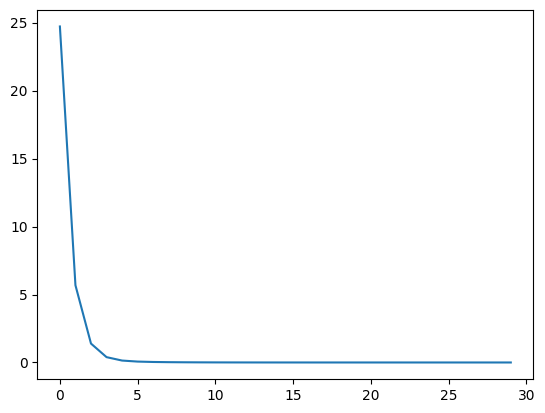

In [27]:
plt.plot(losses)

In [28]:
#using the trained model to get the predictions

#BTS pytorch creates a graph and keep track of the gradients in the graph
#so in case we need to convert the tensor back to the numpy array
#we need to call detach() function to first detach the tensor from the graph
#and convert it into the numpy array
predicted = model(inputs).detach().numpy()

<function matplotlib.pyplot.show(close=None, block=None)>

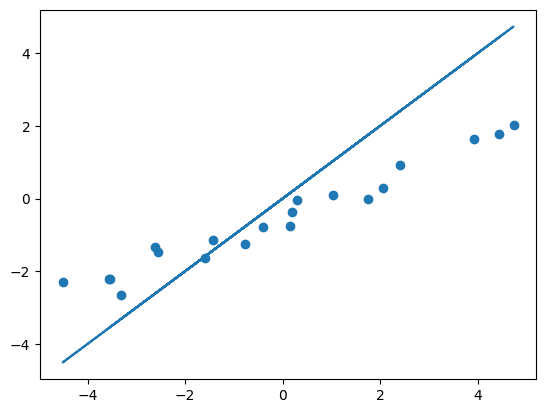

In [29]:
plt.scatter(X,Y,label = 'Original_Data')
plt.plot(X,predicted, label = 'Fitted_Line')
plt.legend
plt.show

In [31]:
#last thing we would like to do is to check and inspect the model and to see if the parameters are close to the true values
#we used synthetic data so we know the values of parametrs w and b == 0.5 and 1 respectively
#this helps us in model evaluation
w = model.weight.data.numpy()
b = model.bias.data.numpy()


In [32]:
w,b

(array([[1.0000231]], dtype=float32), array([0.00089521], dtype=float32))